In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [20]:
df  = pd.read_csv('Mall_Customers - Copy.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
x=df.iloc[:,[3,4]].values

In [23]:
wcss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss


C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[269981.28,
 181665.82312925172,
 106348.37306211119,
 73880.64496247195,
 66674.36000494967,
 37233.81451071001,
 31924.23890692641,
 29459.129013141766,
 23217.097627410843,
 20059.34435090104]

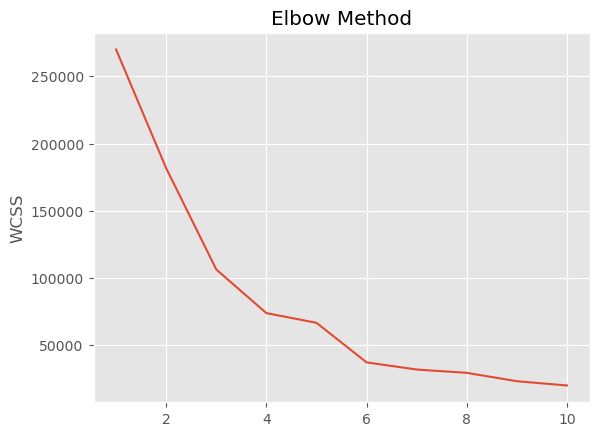

In [25]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.ylabel('RANGE')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [27]:
ymeans=KMeans(n_clusters=5)
pred=ymeans.fit_predict(x)
pred

C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

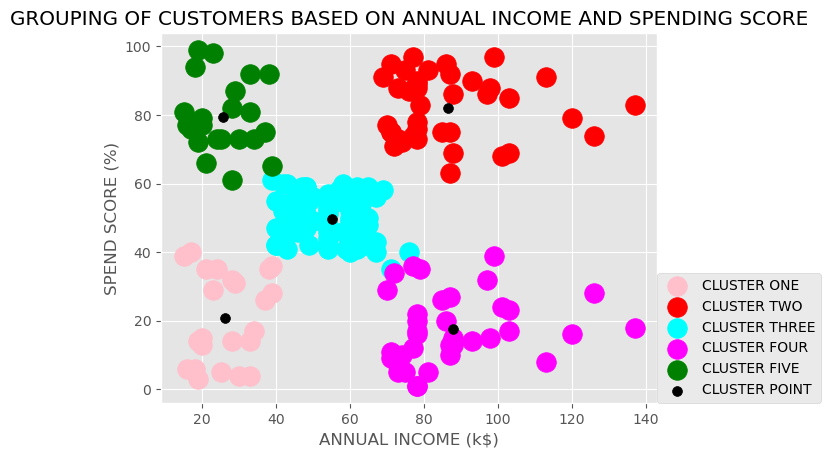

In [32]:
plt.scatter(x[pred==0,0], x[pred==0,1], c= 'pink', s=200, label='CLUSTER ONE')
plt.scatter(x[pred==1,0], x[pred==1,1], c= 'red', s=200, label='CLUSTER TWO')
plt.scatter(x[pred==2,0], x[pred==2,1], c= 'cyan', s=200, label='CLUSTER THREE')
plt.scatter(x[pred==3,0], x[pred==3,1], c= 'magenta', s=200, label='CLUSTER FOUR')
plt.scatter(x[pred==4,0], x[pred==4,1], c= 'green', s=200, label='CLUSTER FIVE')

plt.scatter(ymeans.cluster_centers_[:,0 ],ymeans.cluster_centers_[:,1], c= 'black', s=50, label='CLUSTER POINT')
plt.xlabel('ANNUAL INCOME (k$)')
plt.ylabel('SPEND SCORE (%)')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()